# Quick Start

The easiest way to start is to use a Jupyter notebook and review the results as you get them.

Let us start with a very first example:

1. Create a solar system with all planets and Pluto.
2. Add one asteroid 463 Lola.
3. Verify if this asteroid is a resonant one.

## NB

*  Note that the first run might take some time because the app needs to download the AstDys catalogue and the data for the Solar System.
* `sim.dt` is set to `1` to speed up this test run, and `sim.plot` is set to `show` to show the results in the notebook (rather than saving them in PNG).

In [ ]:
%%capture
! pip install resonances

In [2]:
import warnings
warnings.filterwarnings("ignore")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Pluto'... 
Found: Pluto Barycenter (9) (chosen from query 'Pluto')
Searching NASA Horizons for '463;'... 
Found: 463 L

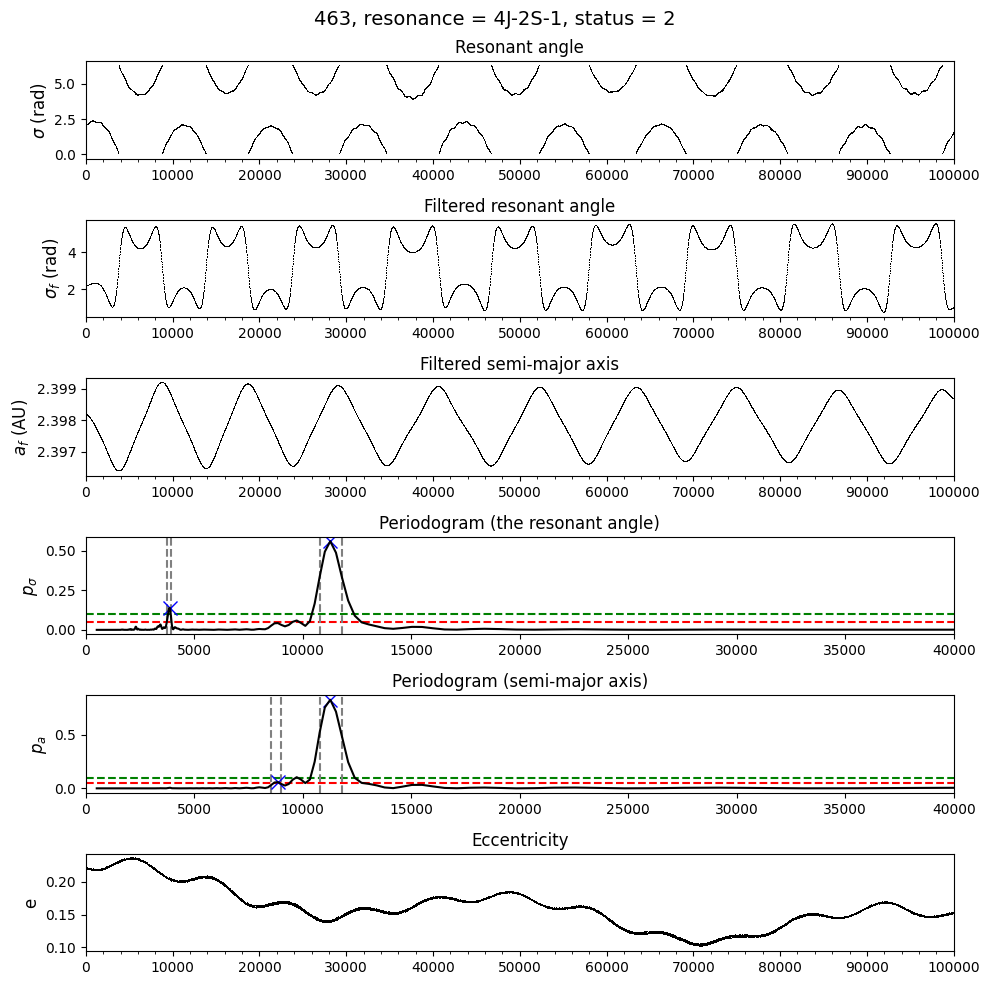

In [3]:
import resonances

sim = resonances.check(463, '4J-2S-1')
sim.run()

You might see on the plot:

- the resonant angle vs time,
- the filtered values of the resonant angle and semi-major axis vs time,
- the periodograms of both variables, eccentricity vs time.

As expected, the asteroid 463 Lola is in three-body body mean-motion resonance with Jupiter and Saturn, which is defined in the code `4J-2S-1` (`J` means Jupiter, `S` means Saturn, `4`, `-2`, and `-1` are integers), because the resonant angle librates and the periodograms have a shared peak around `11000` years.

There are extra lines on the panels related to the periodograms of the semi-major axis and the resonant angle. 

- The vertical gray dashed lines highlights the peaks related to the frequencies of oscillations. In other words, if there is a libration with the period of `10,000` years, the gray lines will be near `10,000`. The first line represents the start of the peak (which corresponds to the minimum value of libration's period), whereas the second line represents the end of the peak (the maximum value). If there are several possible frequencies, there will be multiple gray lines: two per peak.
- The red and green horizontal lines represents the critical values for the frequency to be identified. If the maximum value (the peak value, which is marked with a cross) is greater than the green line, then one might consider the frequency to be reliably determined. If the value is below the red line, then this is a false positive. For the peaks between the green and the red lines, it is up to the researcher to decide.

    Note that you might change the critical values (which are set by default to `0.05` and `0.1`) related to the green and red lines, depending on your model and simulation. The corresponding config values are provided in the [Config section](../config) of the documentation. 

Now you can check other asteroids (just change their titles) or resonances. If you need a better precision , do not hesitate to change integrator's data, such as the integrator itself, its parameters, or the integration time, see [Config](../config).

## Find asteroid's resonances

Let one wants to identify all three-body and two-body resonances of an asteroid. One has to perform the following steps:

1. set up the model, including planets and their initial conditions;
2. add an object (or objects), which is examined;
3. find possible resonances, in which the object can be trapped in;
4. integrate the differential equations of motion for a long period of time (usually, $\approx 10^5$ yrs);
5. identify the resonant status of the object based on the analysis of the resonant angle, semi-major axis, and other variables.

Without loss of generality, let's examine the following case:

1. The target object is the asteroid 463 Lola.
2. The planets are Jupiter and Saturn for both, three-body and two-body cases.

To perform this, there is a function `find`.

Searching NASA Horizons for '463;'... 
Found: 463 Lola (A900 UK) 


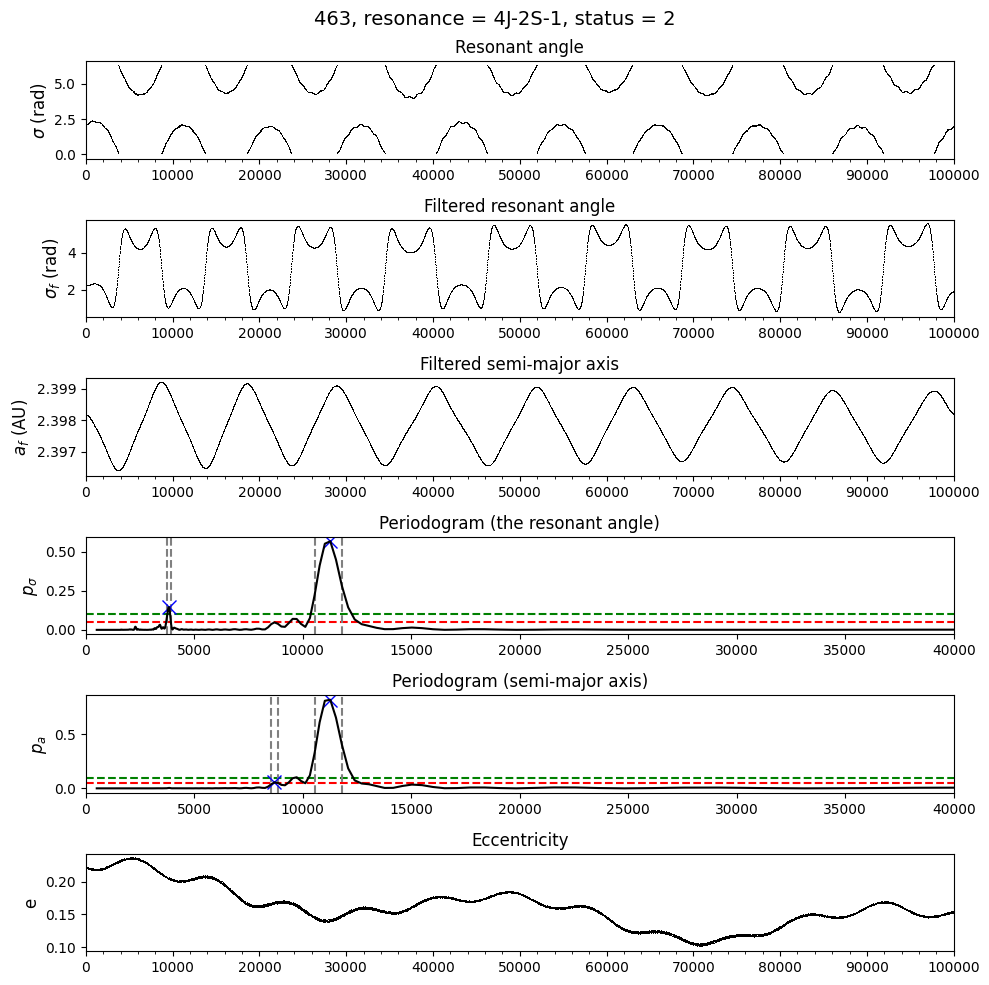

In [4]:
import resonances

sim = resonances.find(463, ['Jupiter', 'Saturn'])
sim.run()

By default, the package will display the cases where the status is not non-resonant. If you want to see all cases, you can set `show_all=True` in the simulation parameters. However, you have access to all the results in `summary` variable:

In [5]:
df_summary = sim.get_simulation_summary()
df_summary.head(10)

,name,mmr,status,pure,num_libration_periods,max_libration_length,monotony,overlapping,a,e,inc,Omega,omega,M
0,463,2J+3S-1+0+0-4,0,False,106,1193.888189,0.005890,,2.398004,0.219764,0.23634,0.636912,5.751011,3.184299
1,463,4J-2S-1+0+0-1,2,True,1,100000.074689,0.504935,"(8543, 8848), (10544, 11801)",2.398004,0.219764,0.23634,0.636912,5.751011,3.184299
2,463,6J-7S-1+0+0+2,0,False,105,1782.873029,0.994110,,2.398004,0.219764,0.23634,0.636912,5.751011,3.184299
3,463,6J+1S-2+0+0-5,0,False,105,1766.954519,0.016714,,2.398004,0.219764,0.23634,0.636912,5.751011,3.184299
4,463,10J-3+0-7,0,False,2784,63.674037,1.000000,,2.398004,0.219764,0.23634,0.636912,5.751011,3.184299
5,463,8S-1+0-7,0,False,211,811.843968,0.003025,"(11264, 13045)",2.398004,0.219764,0.23634,0.636912,5.751011,3.184299
6,463,8S+1+0-9,0,False,2473,63.674037,1.000000,,2.398004,0.219764,0.23634,0.636912,5.751011,3.184299


The columns are:

- `name`: ID of the asteroid or celestial body
- `mmr`: Mean motion resonance code (e.g., '4J-2S-1' for Jupiter-Saturn resonance)
- `status`: Resonance status (0 for non-resonant, 2 for pure resonant, 1 for transient, -1 - controversial but possibly transient, -2 - controversial but possibly pure resonant; see [Libration](../libration) Section for more details)
- `pure`: Boolean indicating if the resonance is pure (no circulation periods)
- `num_libration_periods`: Number of libration periods detected
- `max_libration_length`: Maximum length of one libration in years
- `monotony`: Measure of the resonant angle's monotonicity
- `overlapping`: Overlapping regions of different resonances
- `a`: Semi-major axis in astronomical units
- `e`: Eccentricity
- `inc`: Inclination in radians
- `Omega`: Longitude of ascending node in radians
- `omega`: Argument of perihelion in radians
- `M`: Mean anomaly in radians

Based on the dataframe, the only non-zero status is for the resonance `4J-2S-1`. Therefore, we can claim that the asteroid 463 Lola is trapped in the pure resonance `4J-2S-1`.

The function `find` accepts different types of inputs:

- `asteroids` - the number or name of the asteroid or a list of numbers or names;
- `planets` - the list of the names of the planets;
- `name` - name of the simulation, which is used as a directory name to store the output;
- `sigma2` - the threshold for two-body resonant axis value (looking for objects with semi-major axis from a-sigma2 to a+sigma2); default is `0.02`;
- `sigma3` - the same but for three-body resonances; default is `0.1`);

The first parameter (`asteroids`) can be an asteroid's number, a string (for unnumbered asteroids), or a list of numbers. For example, you might want to examine simultaneously several objects:

Searching NASA Horizons for '463;'... 
Found: 463 Lola (A900 UK) 
Searching NASA Horizons for '490;'... 
Found: 490 Veritas (A902 RE) 
Searching NASA Horizons for '2348;'... 
Found: 2348 Michkovitch (1939 AA) 


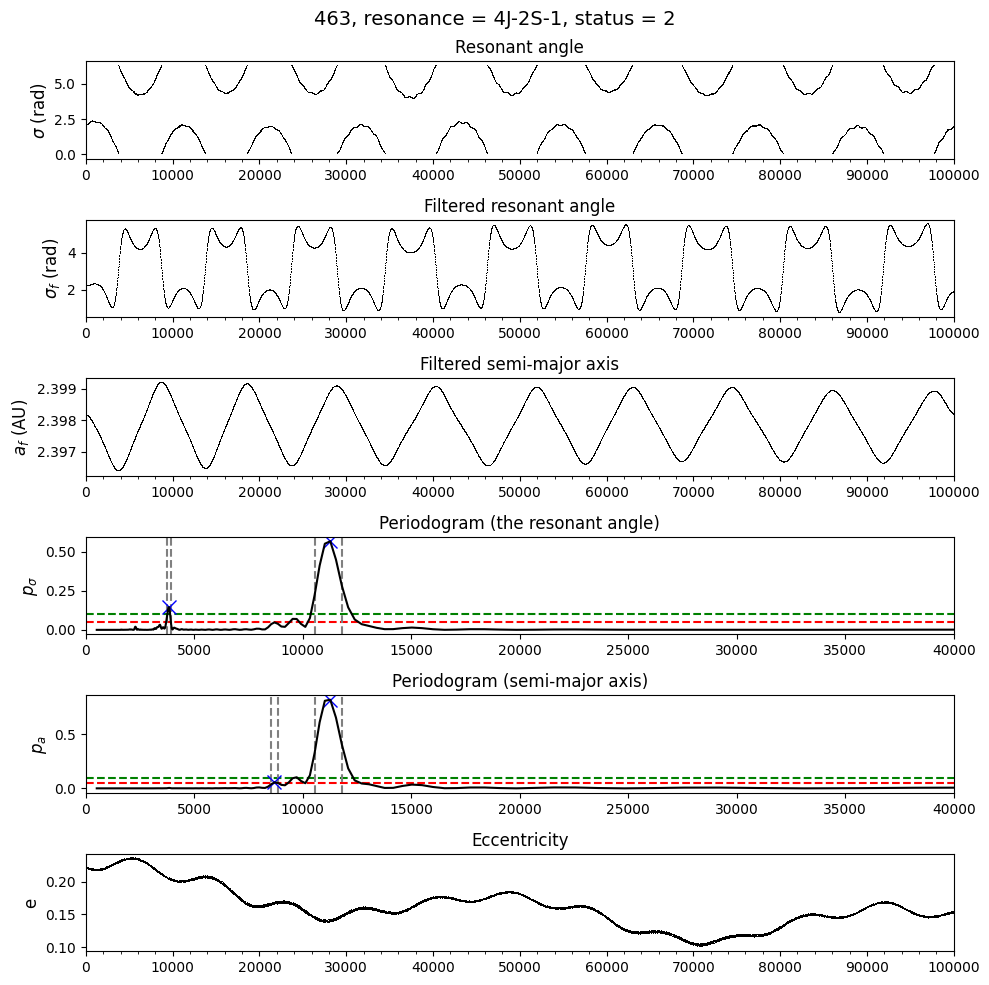

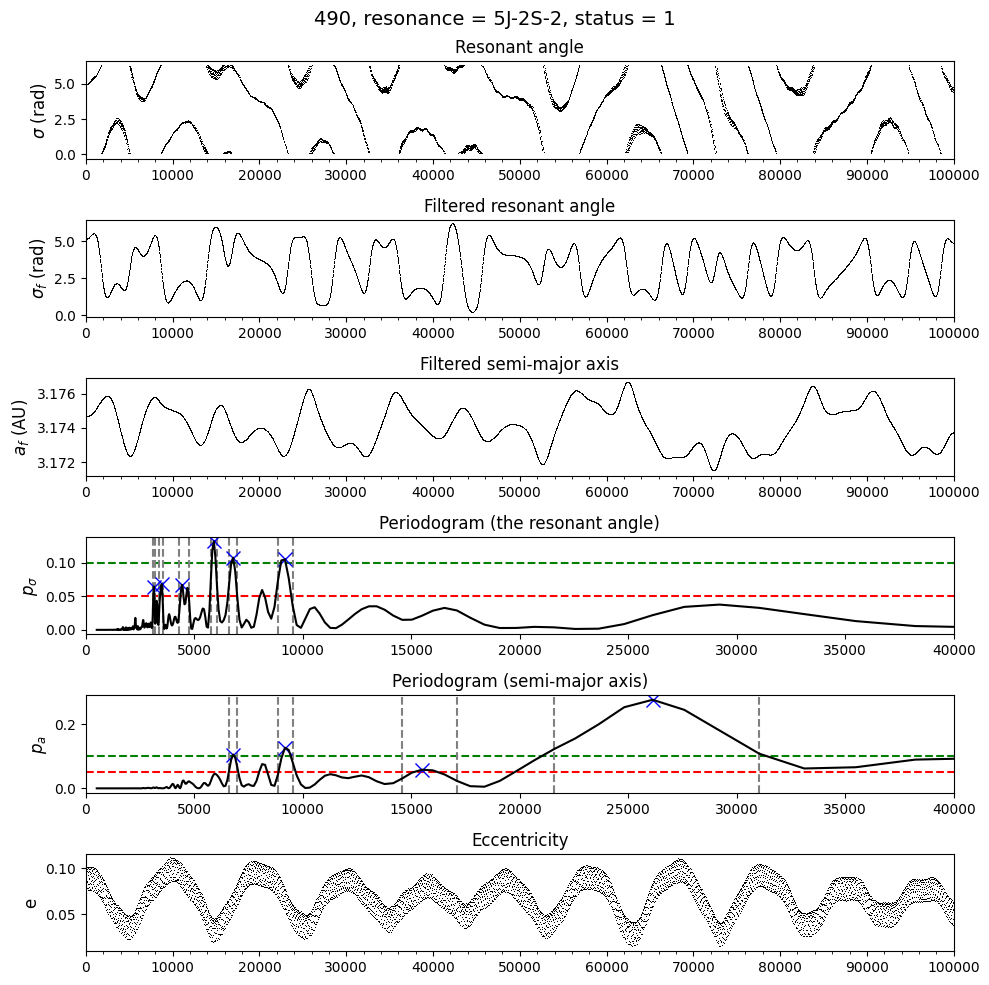

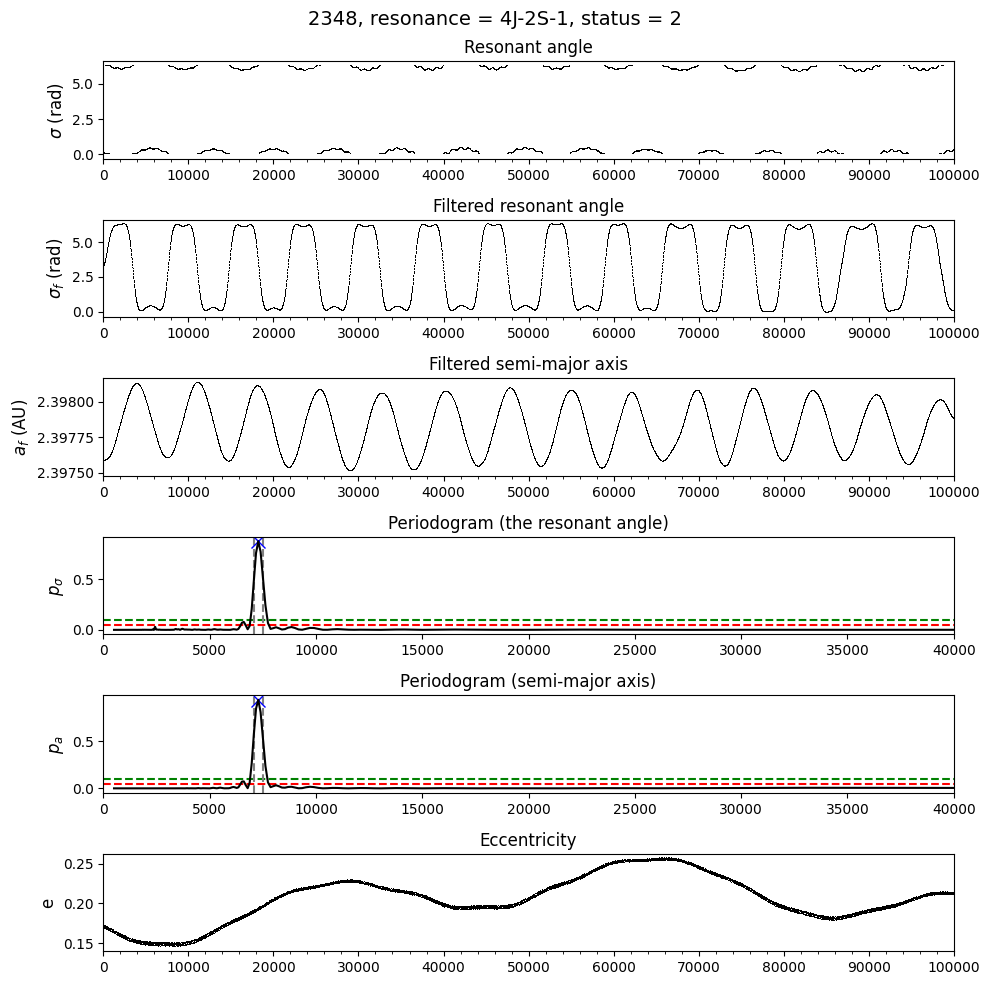

In [5]:
sim = resonances.find([463, 490, 2348], planets=['Jupiter', 'Saturn'])
sim.run()

Thus, all these asteroids are in resonances: 463 and 2348 — in 4J-2S-1, whereas 490 — in 5J-2S-2.

## MMRs by semi-major axis

One might want to find all resonances for a given semi-major axis and the threshold. This can be done by the function `find_asteroids_in_mmr`. It has the following inputs:

- `a` (float): Semi-major axis value to search for resonances around
- `planets` (list): List of planets to consider. All planets used if None
- `sigma2` (float, default=0.1): Width parameter for two-body resonance search
- `sigma3` (float, default=0.02): Width parameter for three-body resonance search  
- `sigma` (float, optional): Single width parameter that overrides both sigma2 and sigma3

The function returns a list of resonances (MMR objects), which are found for the given semi-major axis.

    Note that the function requires AstDyS catalog to be downloaded. If it is not downloaded, the function will download it.

In [14]:
mmrs = resonances.find_resonances(2.39, sigma=0.05, planets=['Jupiter', 'Saturn', 'Mars'])
for mmr in mmrs:
    print(f"{mmr.to_short()}, axis={mmr.resonant_axis}")

1M-3J-1, axis=2.342528776658818
2M-3J-3, axis=2.3926127224362483
2M+3J-5, axis=2.434668465374663
3M-3J-5, axis=2.4029551594614804
3M+3J-7, axis=2.430073662671816
3M+4J-7, axis=2.3589060213049162
4M-3J-7, axis=2.4074221067469654
2M+1S-4, axis=2.3685933424168515
3M+1S-6, axis=2.384999746764762
3M+2S-6, axis=2.352466015354106
2J+3S-1, axis=2.3923241120696424
4J-2S-1, axis=2.3984960978192222
6J-7S-1, axis=2.4047051998943636
6J+1S-2, axis=2.395405485482911
7J-1S-2, axis=2.347954316521227
1M-2, axis=2.418742714279021
1M+2, axis=2.418742714279021
8S-1, axis=2.3853747075
8S+1, axis=2.3853747075


Now, you can select some of these resonances and examine them in more detail.

## Custom object

One might want to examine a custom object and specify the elements manually. To do this, one should provide Keplerian elements of the object and resonances to check.

In [18]:
elems = {
    "a": 5.270635994654261,
    "e": 0.02299891948665412,
    "inc": 0.316860843630838,
    "Omega": 5.9827890156476125,
    "omega": 3.141712198994225,
    "M": 5.033788240164378,
    "epoch": 60000.0,
}
sim = resonances.Simulation(name="custom", date='2023-02-25')

When creating a simulation, one can provide extra configuration options, see [Config](../config). For now, we set `name` (to save the results in the desired directory) and the date. The date is crucial because the object and the planets should be at the same epoch. The planet's data is taken from NASA JPL Horizons and hence, requires the date to be specified. The date is in string format.

Now, we need to create the Solar system. It will utilize the date we've specified earlier.

In [ ]:
sim.create_solar_system()

In [21]:
sim.add_body(elems, ['1J-1', '4J-2S-1'], name='624 Hektor')

`add_body` function adds an object to the simulation. It has the following inputs:

- `elem_or_num` (mixed): The number of an asteroid, the name of the asteroid, or the Keplerian elements (dict) of the object. In our case, we've used the dictionary.
- `mmr` (str, MMR, List[MMR]): a string representation of a resonance (i.e., '1J-1'), an MMR object, or a list of them.
- `name` (str): Name of the object. Used only for display purposes and in dataframes.

Now, we can run the simulation.

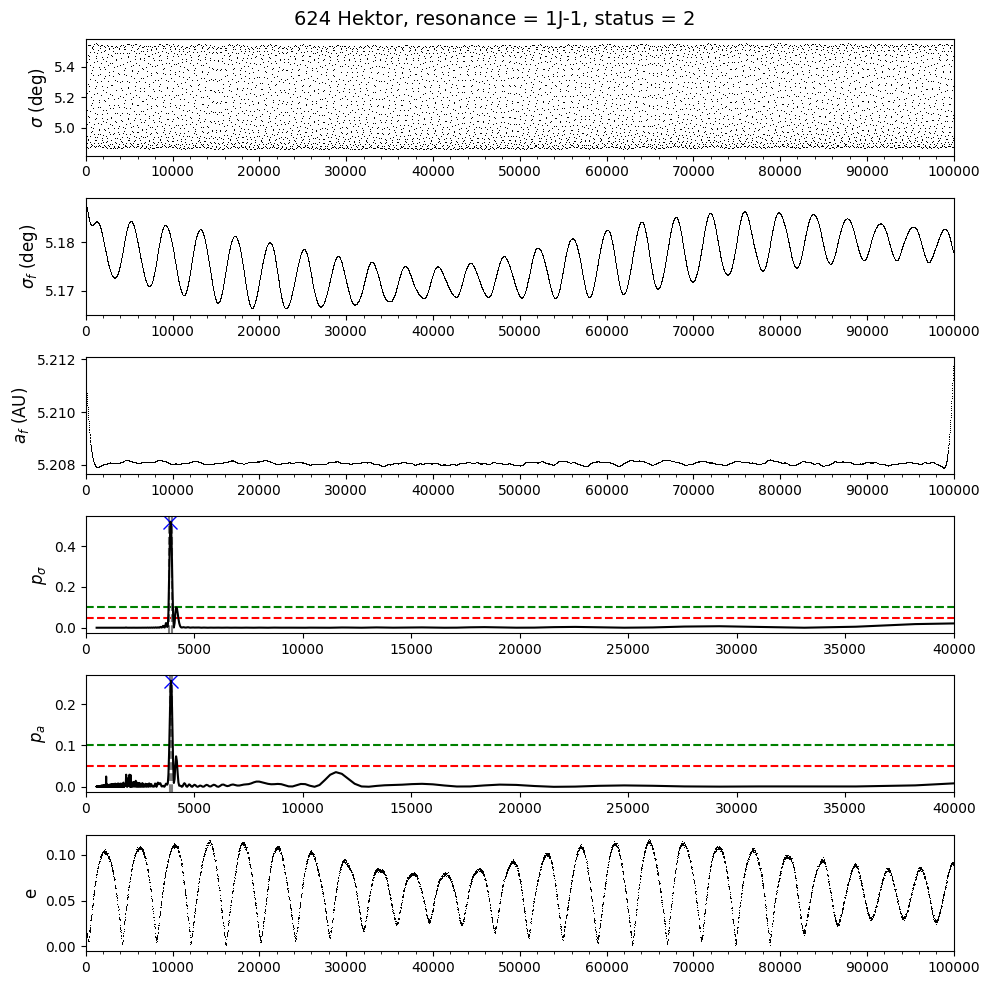

In [22]:
sim.run()

As expected, Hektor is trojan of Jupiter, and it is in the 1J-1 resonance. It is not trapped in 4J-2S-1. By default, only the resonant images are plotted. However, we can update this by setting up the `plot` parameter when creating the simulation. `plot` can be one of: `False` (no plots), `all` (all plots), `resonant` (only resonant plots), `nonzero` (resonant and controversial cases), `candidates` (only candidates/controversial cases).

In [25]:
sim = resonances.Simulation(name="custom", date='2023-02-25', plot='all')
sim.create_solar_system()
sim.add_body(elems, ['1J-1', '4J-2S-1'], name='624 Hektor')

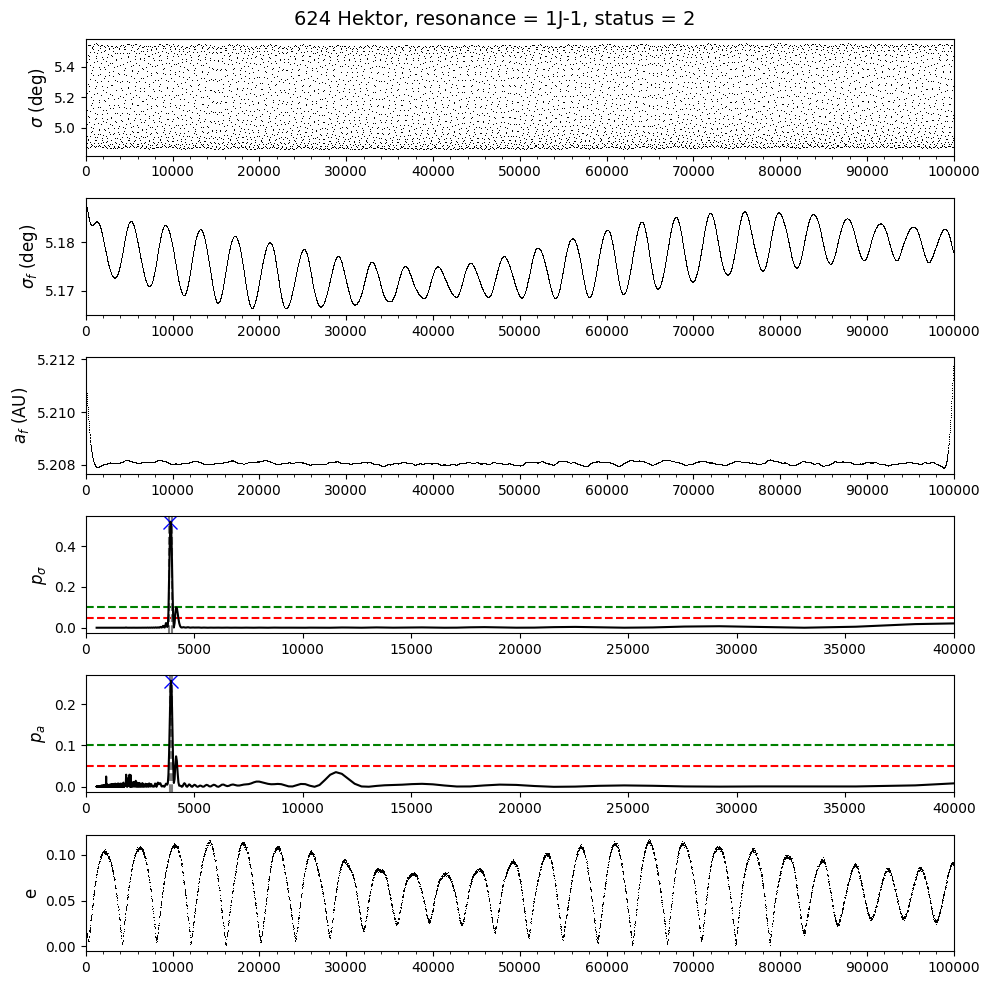

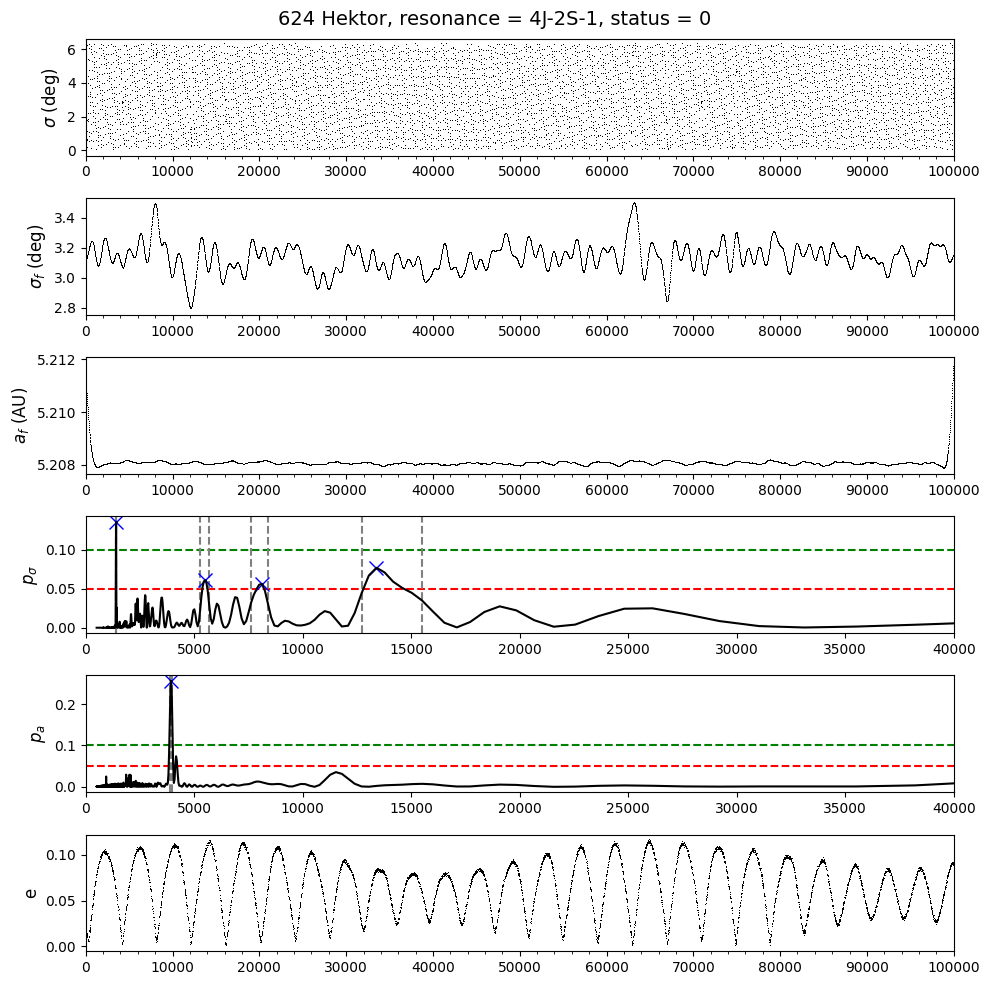

In [26]:
sim.run()

Now we can clearly see that the resonant angle of the MMR 4J-2S-1 does not librate. Therefore, Hektor is not trapped in this resonance.

## What's next

- The examples of how the package can be used is in the [Examples](../examples) Section.
- There are a few more examples in the [Simulation and Bodies](../core) Section.
- The description of how the resonance identification procedure works are in [Libration](../libration) Section.
- The description of default config values and how to change them is in [Config](../config).
- A few examples of some tasks, i.e. identification of the resonances for the given asteroid, are in [Advanced](../console) Section.